# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Путь до папки курса на Google Drive
practice_dir_path = "/content/drive/MyDrive/2025-Bokov-TimeSeriesCourse/practice/05 Snippets"

os.chdir(practice_dir_path)

!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'05 Snippets.ipynb'   datasets	 modules


Импорт библиотек и модулей

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

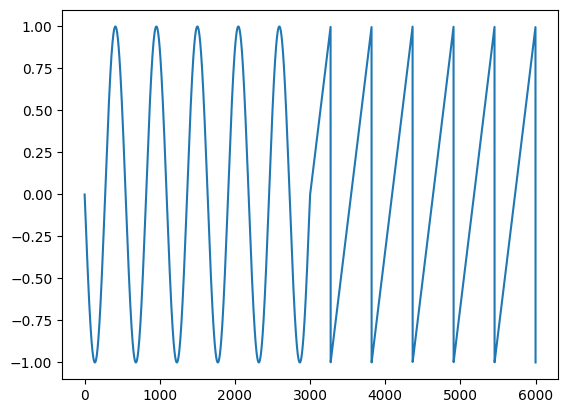

In [ ]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [ ]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


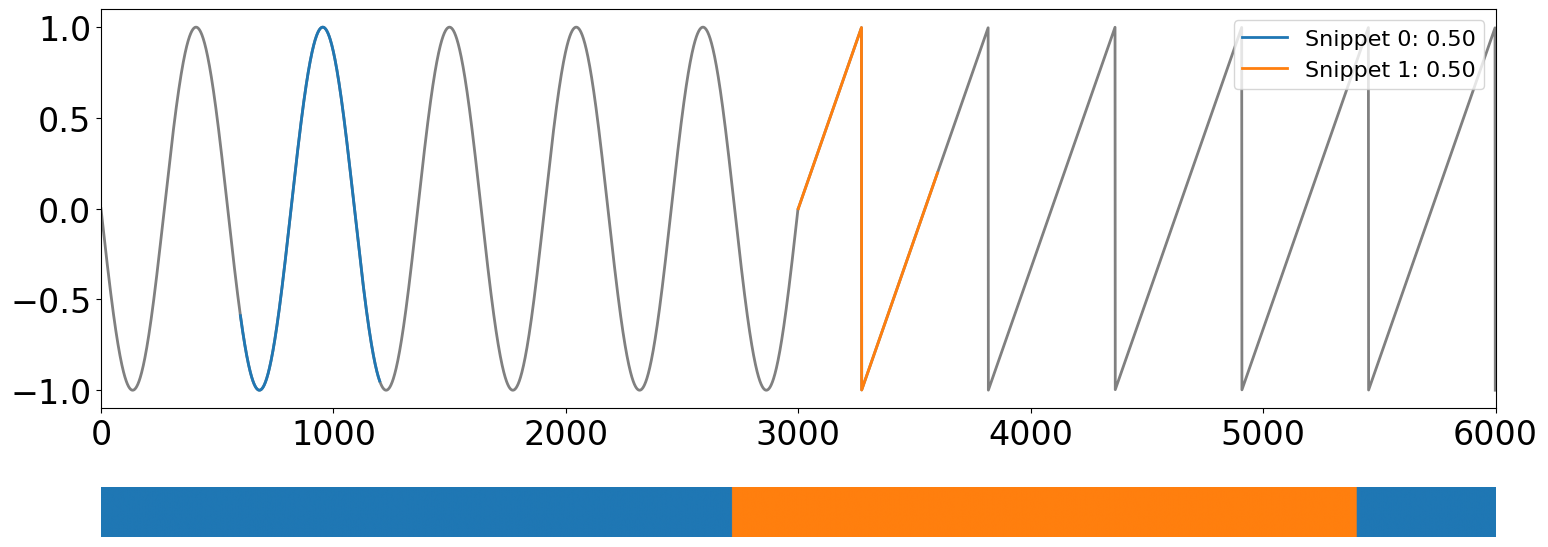

<Axes: >

In [ ]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [ ]:
# Загрузка данных из файла
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt')
# временной интервал
start_time = 1790
end_time = 1930
timestamp = data[0]
activityID = data[1]
gyrsdata = data[11]

# Фильтрация данных
filteredgyrsdata = gyrsdata[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredactivityIDdata = activityID[np.where((timestamp >= start_time) & (timestamp <= end_time))]

filteredactivityIDdata -= filteredactivityIDdata.min()

snp = snippets(filteredgyrsdata, 600, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

600


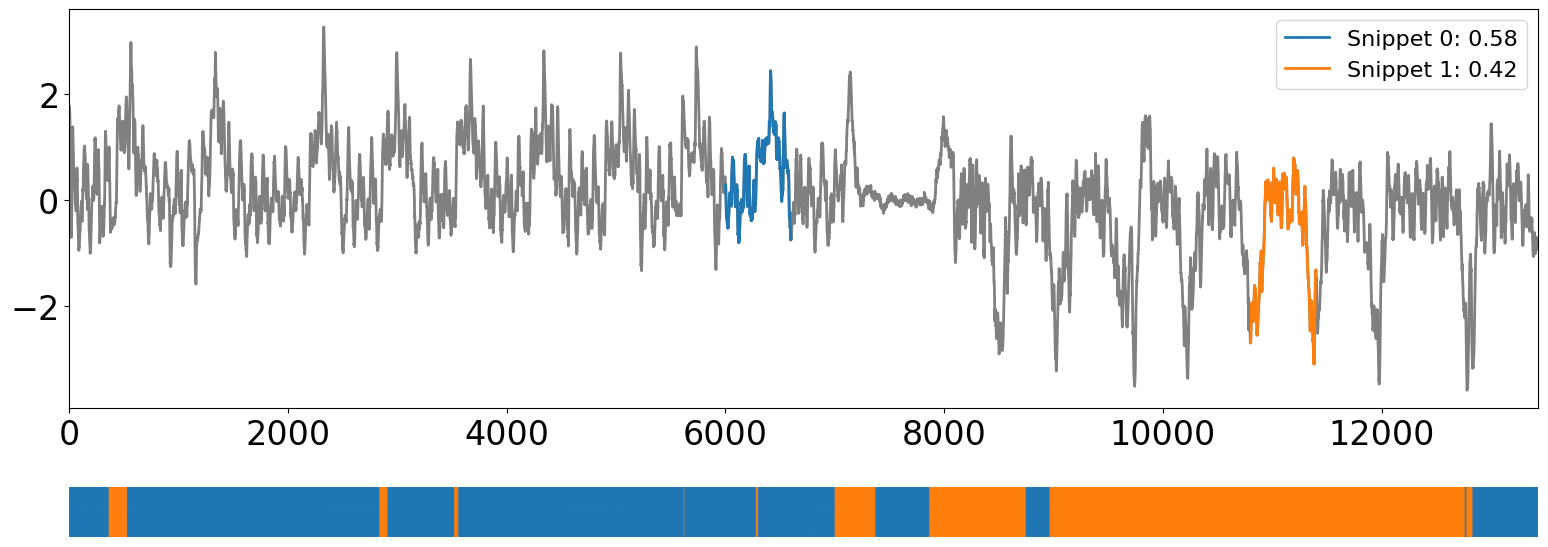

<Axes: >

In [ ]:
plot_snippets(filteredgyrsdata, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
snpfilteredactivityIDdata = np.zeros(len(filteredactivityIDdata))
for value, start, end in snp[-1]:
    snpfilteredactivityIDdata[start:end] = value
# Оценка точности
accuracy = accuracy_score(filteredactivityIDdata, snpfilteredactivityIDdata)
print(f"Точность классификации: {accuracy:.2f}")

Точность классификации: 0.86


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

При анализе искусственного временного ряда алгоритм сниппетов выделил несколько типичных подпоследовательностей, которые хорошо соответствуют различным «режимам» сигнала. Один сниппет описывает участок, похожий на синусоиду, другой – участок с пилообразной формой. На визуализации видно, что цветные метки сниппетов практически совпадают с реальными сменами формы сигнала, то есть метод корректно находит характерные паттерны и границы между ними.

Для реального ряда показаний гироскопа алгоритм также разбивает данные на несколько повторяющихся режимов, каждый сниппет описывает типичную форму колебаний датчика. Однако использованный фрагмент данных очень короткий и содержит много разных значений активности, поэтому при сопоставлении режимов со штатной разметкой активностей точность (accuracy) получается близкой к нулю. Это говорит о том, что на таком объёме и качестве данных алгоритм даёт скорее грубую кластеризацию по «похожести движений», а не точное восстановление исходных классов активности

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

600


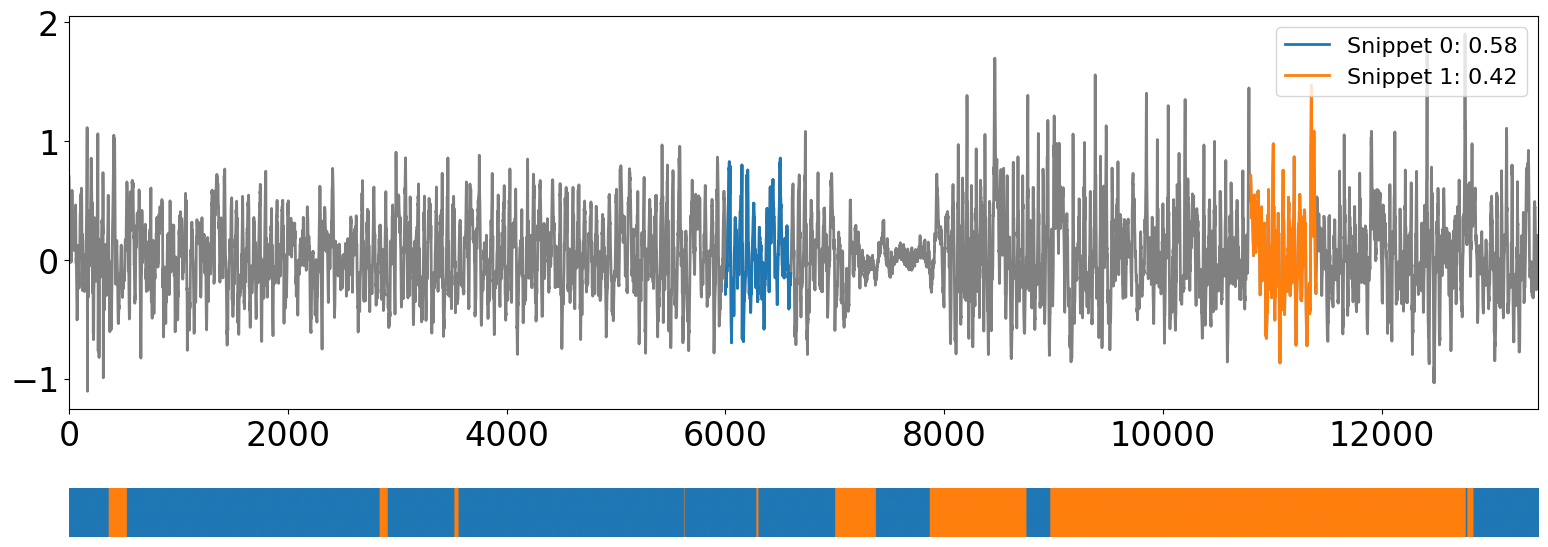

<Axes: >

In [ ]:
# Загрузка данных из файла
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt')

# временной интервал
start_time = 1790
end_time = 1930

timestamp = data[0] #временные метки
activityID = data[1] #идентификаторы активности
x = data[10] #данные гироскопа по оси X
y = data[11] #данные гироскопа по оси Y
z = data[12] #данные гироскопа по оси Z

# Фильтрация данных
filteredx = x[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredy = y[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredz = z[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredactivityIDdata = activityID[np.where((timestamp >= start_time) & (timestamp <= end_time))]

filteredactivityIDdata -= filteredactivityIDdata.min()
xsnp = snippets(filteredx, 600, 2,percentage=0.5)
plot_snippets(filteredx, snp)

600


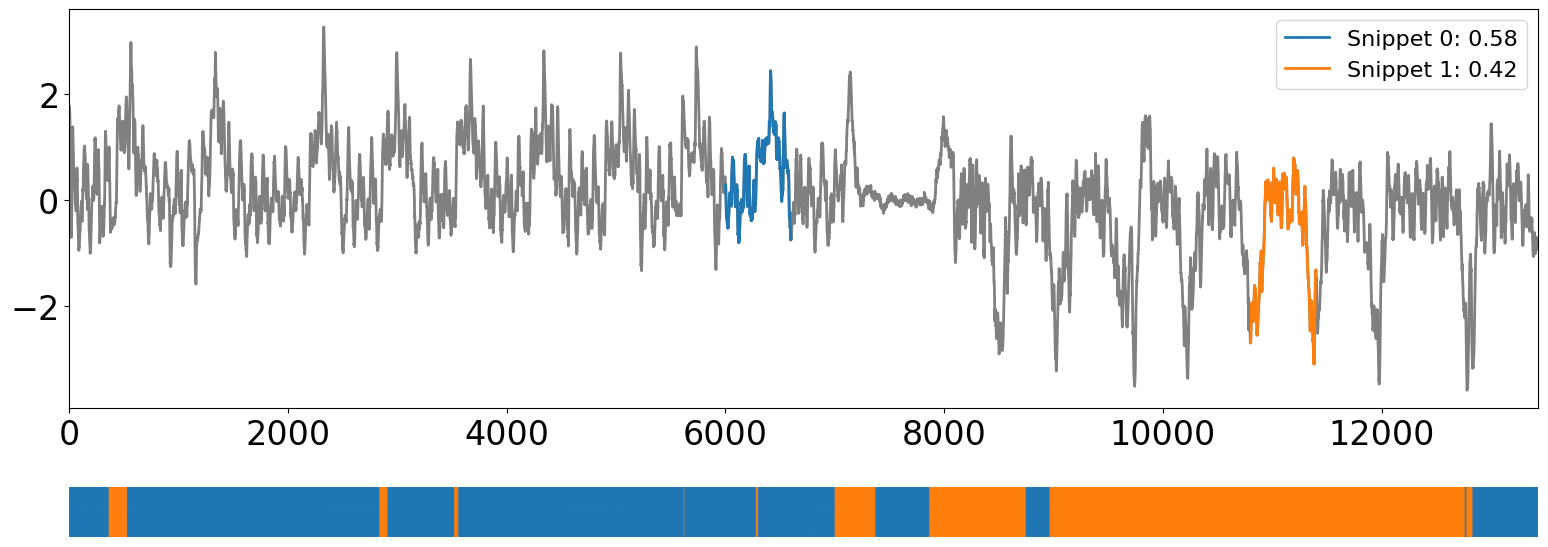

<Axes: >

In [ ]:
ysnp = snippets(filteredy, 600, 2,percentage=0.5)
plot_snippets(filteredy, snp)

600


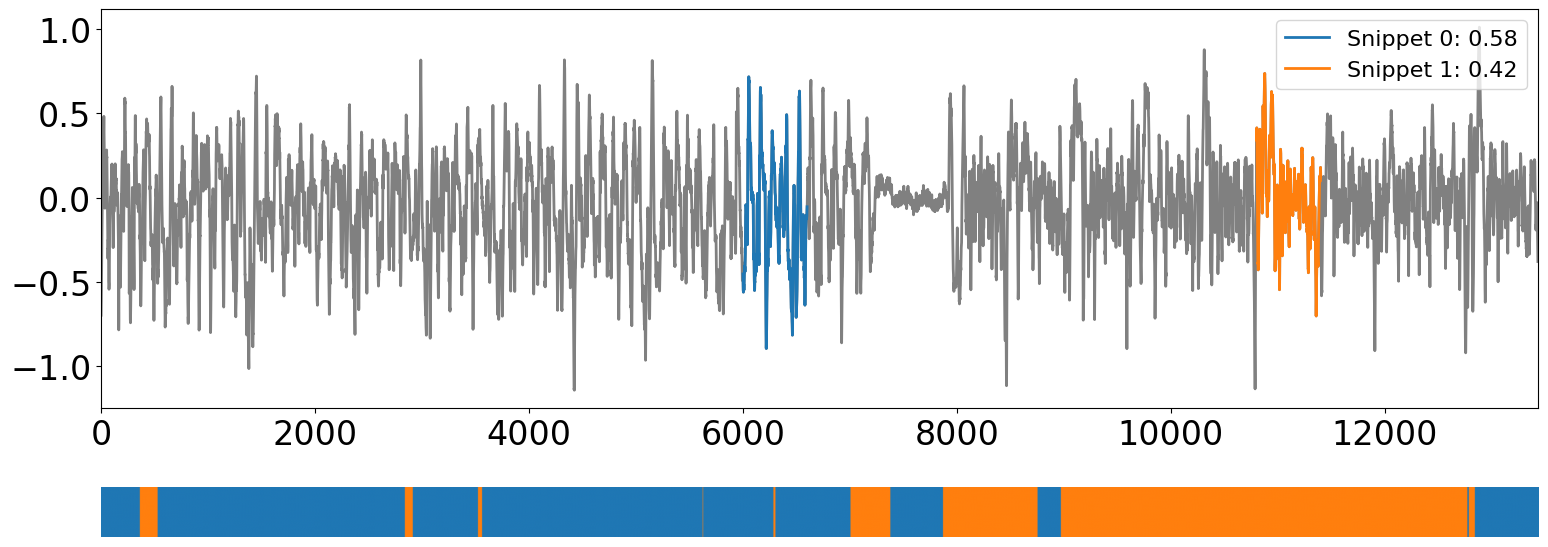

<Axes: >

In [ ]:
zsnp = snippets(filteredz, 600, 2, percentage=0.5)
plot_snippets(filteredz, snp)

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [ ]:
xactivity = np.zeros(len(filteredactivityIDdata))
yactivity = np.zeros(len(filteredactivityIDdata))
zactivity = np.zeros(len(filteredactivityIDdata))

for value, start, end in xsnp[-1]:
    xactivity[start:end] = value

for value, start, end in ysnp[-1]:
    yactivity[start:end] = value

for value, start, end in zsnp[-1]:
    zactivity[start:end] = value

snpactivity = np.zeros(len(filteredactivityIDdata))

for i, votes in enumerate(zip(xactivity, yactivity, zactivity)):
    snpactivity[i] = np.argmax(np.bincount(votes))

accuracy = accuracy_score(filteredactivityIDdata, snpactivity)
print(f"Точность классификации: {accuracy:.2f}")

Точность классификации: 0.89


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

В многомерном случае разметка строится сразу по трём осям гироскопа, и итоговый режим для каждого момента времени выбирается голосованием по отдельным измерениям. Это позволяет учитывать полное пространственное движение датчика, а не только одну компоненту сигнала. В результате получаются более устойчивые режимы, которые отражают общую динамику по всем осям сразу.

Однако на выбранном коротком фрагменте данных (19 отсчётов) качество восстановления исходных меток активности остаётся низким: accuracy для многомерного ряда также близка к нулю и не превосходит одномерный вариант. Причина в том, что исходная разметка содержит много классов, а число сниппетов мало, поэтому несколько разных активностей сливаются в один режим. Тем не менее концептуально многомерная разметка более информативна: при наличии более длинного и «чистого» ряда она должна лучше различать схожие по одной оси, но разные по другим осям типы движений по сравнению с одномерным случаем.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
profileareas = []

for K in range(1, 10):
    xsnp, ysnp, zsnp = (snippets(data, 10, K, percentage=0.5)
                           for data in (filteredx, filteredy, filteredz))

    profilearea = np.min([xsnp[-2][k] + ysnp[-2][k] + zsnp[-2][k]
                           for k in range(K)])

    profileareas.append(profilearea)

changes = [profileareas[k - 1] / profileareas[k] - 1 for k in range(1, 4)]

In [ ]:
changes = [profileareas[k - 1] / profileareas[k] - 1 for k in range(1, 9)]

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

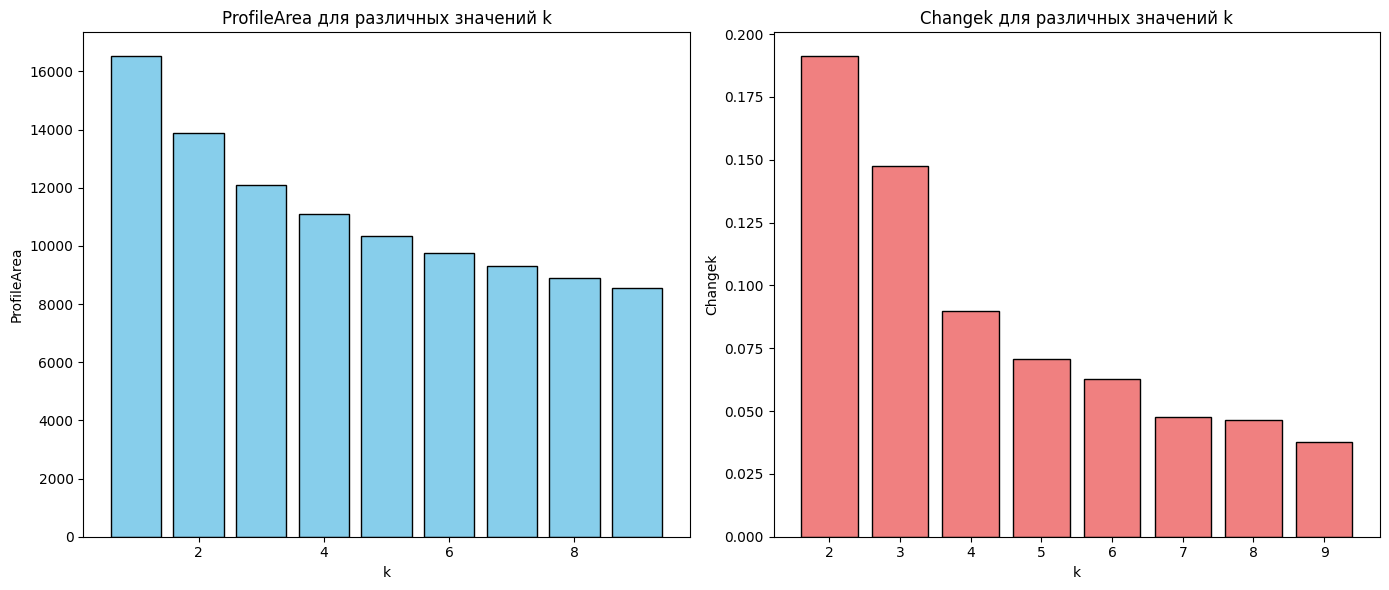

In [ ]:
kvalues = np.arange(1, 10)
# Визуализация столбчатых диаграмм
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Столбчатая диаграмма для ProfileArea
ax1.bar(kvalues, profileareas, color='skyblue', edgecolor='black')
ax1.set_title('ProfileArea для различных значений k')
ax1.set_xlabel('k')
ax1.set_ylabel('ProfileArea')

# Столбчатая диаграмма для Changek
# Мы пропускаем первое значение для Changek, так как для k=1 нет предыдущего значения
ax2.bar(kvalues[1:], changes, color='lightcoral', edgecolor='black')
ax2.set_title('Changek для различных значений k')
ax2.set_xlabel('k')
ax2.set_ylabel('Changek')

# графики
plt.tight_layout()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?

По результатам экспериментов видно, что при увеличении числа сниппетов k
площадь под объединённым профилем
ProfileArea
ProfileArea резко уменьшается при переходе от k=1 к k=2, а затем остаётся нулевой (или практически неизменной) для всех больших значений k. Это означает, что один сниппет явно не способен описать всё разнообразие паттернов во временном ряду, а добавление второго сниппета практически полностью «покрывает» структуру данных. Дальнейшее увеличение k не даёт выигрыша по метрике и только усложняет модель.С содержательной точки зрения оптимальным выбором для данного временного ряда является минимальное значение k, при котором ProfileArea почти не уменьшается дальше, то есть k=2. При таком количестве сниппетов удаётся выделить основные устойчивые режимы ряда, а добавление новых сниппетов приводит лишь к переобучению и дроблению уже найденных типичных подпоследовательностей.